<a href="https://colab.research.google.com/github/jrojasmo/EjerciciosML-2021-I/blob/main/Ejercicios3_ML_jrojasmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introducción al Aprendizaje de Máquina 2021-I \\
*Jesús Andrés Rojas Montenegro*

#**1. Ejercicio 2.2**
**a.** Verificar la cota del Teorema 2.4 en los tres casos del del Ejemplo 2.2:
>Teorema 2.4: Si $m_{\mathcal{H}}(k)<2^k$ para algún valor de $k$, entonces
$$m_{\mathcal{H}}(k)\leq \sum_{i=0}^{k-1}\binom{N}{i}$$
para todo $N$.

<blockquote> 
<b>(i)</b>  Rayos positivos: $\mathcal{H}$ consiste en todas las hipótesis en una dimensión de la forma $h(x)=\textsf{sign}(x-a)$.

<b>Respuesta.</b> Para este caso la función de crecimiento es $N+1$, luego el *break point* ($k$) es 2 porque $k+1=3<4=2^2$. Entonces, 
$$\sum_{i=0}^{k-1}\binom{N}{i}=1+N$$
haciendo claramente que se cumpla la desigualdad para cualquier N.
</blockquote>

<blockquote> 
<b>(ii)</b>  Intervalos positivos: $\mathcal{H}$ consiste en todas las hipótesis en una dimensión que son positivos dentro de algún intervalo y negativos fuera de este.

<b>Respuesta.</b> En los intervalos positivos la función de crecimiento es $\frac{1}{2}N^2+\frac{1}{2}N+1$. Luego, es fácil ver que el primer valor que hace que $m_{\mathcal{H}}(k)<2^k$ es $k=3$ porque $m_{\mathcal{H}}(3)=7<2^3$. Así:
$$
\begin{align*}
\sum_{i=0}^{k-1}\binom{N}{i}&=\binom{N}{0}+\binom{N}{1}+\binom{N}{2}\\
                            &=1+N+\frac{N(N-1)}{2}\\
                            &=1+\frac{N(N+1)}{2}\\
                            &=1+\frac{1}{2}N^2+\frac{1}{2}N,
\end{align*}
$$
que es lo mismo que $m_{\mathcal{H}}(N)$ para este caso, por lo que es claro que la desigualdad se cumple para cualquier N.
</blockquote>

<blockquote> 
<b>(iii)</b>  Conjuntos convexos: $\mathcal{H}$ consiste en todas las hipótesis de dos dimensiones que son positivos dentro de algún conjunto convexo y negativo fuera.

<b>Respuesta.</b> Como para los conjuntos convexos $m_{\mathcal{H}}(k)=2^N$, no existe tal $k$ que haga que $m_{\mathcal{H}}(k)<2^k$, por lo que la cota no aplica para este caso.
</blockquote>

**b.** ¿Existe un conjunto de hipótesis para el cual $m_{\mathcal{H}}(N)=N+2^{\lfloor N/2 \rfloor}$?

**Respuesta.** Si suponemos que existe, como para $k=3$ hay un *break point* porque $m_{\mathcal{H}}(3)=5<2^3$, entonces se debe cumplir el Teorema 2.4. Sin embargo, vemos que para $N=14$ no se cumple, $m_{\mathcal{H}}(14)=142$ y 
$$\sum_{i=0}^{2}\binom{14}{i}=1+\frac{1}{2}14^2+\frac{1}{2}14=106.$$
Por lo tanto, tal función de crecimiento no puede existir.

#**2. Ejercicio 2.5**
Supongamos que tenemos un modelo simple de aprendizaje cuya función de crecimiento es $m_{\mathcal{H}}(N)=N+1$, entonces $d_{VC}=1$. Usar la *VC bound* (2.12) para estimar la probabilidad de que $E_{out}$ esté a 0.1 de $E_{in}$ dados 100 ejemplos de entrenamiento. 
 
**Respuesta.** La *VC bound* es, para cualquier tolerancia $\delta>0$,
$$E_{out}(g)\leq E_{in}(g)+\sqrt{\frac{8}{N}\ln{\frac{4m_{\mathcal{H}}(2N)}{\delta}}}$$
con probabilidad $>1-\delta$.
 
Luego, necesitamos hacer que
$$\sqrt{\frac{8}{N}\ln{\frac{4m_{\mathcal{H}}(2N)}{\delta}}}=0.1,$$
y para eso basta con despejar $\delta$, 
$$\delta=4m_{\mathcal{H}}(2N)\exp{\left(-0.1^2\frac{N}{8}\right)}$$
ya que así queda en términos de valores conocidos siendo $m_{\mathcal{H}}(2N)=2N+1.$

In [1]:
import numpy as np
N=100
tol=0.1
d=4*(2*N+1)*np.exp(-(tol)**2*N/8)
print('Estimado de la probabilidad:', 1-d)

Estimado de la probabilidad: -708.5275096780147


Finalmente, el estimado de la probabilidad es menor que cero, lo que nos dice que es altamente probable que no se cumpla lo que queremos (básicamente no tenemos garantizado nada) y que por lo tanto no se pueda aprender tal y como se está configurando. 

#**3. Ejercicio 2.6**
Un *data set* tiene 600 ejemplos. Para probar apropiadamente el rendimiento de la hipótesis final, se aparta un subconjunto seleccionado al azar de 200 ejemplos que no fueron usados en la fase de entrenamiento; esto forma un conjunto de entrenamiento. Tu usas un modelo de aprendizaje con 1000 hipótesis y selecciona  la hipótesis final $g$ basada en 400 ejemplos de entrenamiento. Deseamos estimar $E_{out}(g)$. Tenemos acceso a dos estimados: $E_{in}(g)$, el error *in-sample* de 400 ejemplos de entrenamiento; y, $E_{test}(g)$, el error en los 200 ejemplos de entrenamiento que fueron apartados.
 
**a.** Usando un 5% de tolerancia de error ($\delta=0.05$) ¿qué estimado tiene la mayor 'barra de error'?
 
**Respuesta.** Al tener un número finito de hipótesis podemos usar la desigualdad *Hoeffding* sin problema. De la anterior, se deriva la siguiente cota de generalización: Tomando una tolerancia $\delta$, se puede asegurar con probabilidad como mínimo $1-\delta$ que
$$E_{out}(g)\leq E_{in}(g) + \sqrt{\frac{1}{2N}\ln{\frac{2M}{\delta}}}.$$
 
La explicación de lo anterior está en el libro y es similar a la forma en que se dedujo la *VC bound*.
 
Así que, como en el libro se refieren a 
$$\sqrt{\frac{1}{2N}\ln{\frac{2M}{\delta}}}$$
como la 'barra de error' o la cota de error para el caso de *Hoeffding*, para cada conjunto de datos hay que ver el número de hipótesis que se involucran. 
 
Entonces, para el conjunto de entrenamiento es claro que en el peor caso se usan todas las 1000 hipótesis, por el contrario en el conjunto aislado de prueba sólo se usará una, la que resultó del proceso de aprendizaje. Luego, para $E_{in}$, $N=400$ y $M=1000$, y para $E_{test}$ $N=200$ y $M=1$. 






In [2]:
def errBar(N, M, d):
  return np.sqrt(1/(2*N)*np.log(2*M/d))

print('Barra de error en conjunto E_{test}', errBar(200, 1, 0.05))
print('Barra de error en conjunto E_{in}', errBar(400, 1000, 0.05))

Barra de error en conjunto E_{test} 0.09603227913199208
Barra de error en conjunto E_{in} 0.11509037065006825


Finalmente, el conjunto con mayor barra de error es el del conjunto de datos de muestra, $E_{in}$.

**b.** ¿Hay alguna razón por la que no debería reservarse más ejemplos de prueba? 

Es mejor tratar de mantener el mayor número de datos de muestra posibles para mejorar e incluso (en algunos casos) posibilitar el aprendizaje. De hecho, pienso que se debe priorizar $E_{in}$ para que tenga suficientes casos de prueba y luego (si sobran) reservar para $E_{test}$, generando así una buena hipótesis. 

#**4. Problema 2.1**
En la Ecuación (2.1), sea $\delta=0.03$ y
$$\epsilon (M,N,\delta)=\sqrt{\frac{1}{2N}\ln{\frac{2M}{\delta}}}.$$
<blockquote> 
<b>(a)</b>  Para $M=1$, ¿Cuántos ejemplos necesitamos para hacer $\epsilon \leq 0.05$?
 
<b>Respuesta.</b> Para hacer esto, supongamos el caso en el que dado el error máximo $\epsilon'$, tenemos que
$$\sqrt{\frac{1}{2N}\ln{\frac{2M}{\delta}}}\leq \epsilon'.$$
Luego, basta con despejar $N$ en la desigualdad, 
$$N\geq\frac{\ln{\frac{2M}{\delta}}}{2\epsilon'^2},$$
para saber cuántos ejemplos se necesitan.
Así, fácilmente vemos que son necesarios 840 ejemplos (exactamente 839.94101) para lograr que $\epsilon \leq 0.05$. 
</blockquote>
 
<blockquote> 
<b>(b)</b>  Para $M=100$, ¿Cuántos ejemplos necesitamos para hacer $\epsilon \leq 0.05$?
 
<b>Respuesta.</b> Siguiendo el argumento del anterior punto, concluimos que se necesitan 1761 ejemplos (exactamente 1760.97505).
</blockquote>
 
<blockquote> 
<b>(b)</b>  Para $M=10000$, ¿Cuántos ejemplos necesitamos para hacer $\epsilon \leq 0.05$?
 
<b>Respuesta.</b> Haciendo lo que se hizo en el primer punto, llegamos a que son necesarios 2683 ejemplos (exactamente 2682.00908). 
</blockquote>


In [3]:
def minNmaxEps(M,d,e):
  return np.log(2*M/d)/(2*e**2)

print('Para M=1', minNmaxEps(1, 0.03, 0.05))
print('Para M=100', minNmaxEps(100, 0.03, 0.05))
print('Para M=10000', minNmaxEps(10000, 0.03, 0.05))

Para M=1 839.9410155759853
Para M=100 1760.9750527736032
Para M=10000 2682.0090899712213


#**5. Problema 2.12**
Para un $\mathcal{H}$ con $d_{VC}=10$, ¿qué tamaño de muestra se necesita para tener un 95% de seguridad de que el error de generalización sea como máximo 0.05?
 
**Solución.**
Siguiendo el Ejemplo 2.6 del libro, de la *VC bound* podemos extraer la siguiente desigualdad
$$N\geq\frac{8}{\epsilon^2}\ln{\left(\frac{4m_{\mathcal{H}}(2N)}{\delta}\right)}$$
y usando el hecho de que $m_{\mathcal{H}}(2N)$ es un polinomio del  grado dimensión VC nos queda que:
$$N\geq\frac{8}{\epsilon^2}\ln{\left(\frac{4((2N)^{d_{VC}}+1)}{\delta}\right)}.$$
Ahora bien, la anterior desigualdad es implícita con respecto a $N$, por lo que usando métodos iterativos podemos encontrar una solución. Lo anterior se hace suponiendo un $N$ inicial de 1000, con el que se obtiene un valor para $N$ en el lado derecho de la desigualdad, este lo tomamos como nuevo $N$ y así sucesivamente hasta encontrar que se cumple la desigualdad.


In [4]:
N=1000
dVC=10
eps=0.05  #epsilon
segu=0.95 #mínima probabilidad de que se cumpla la cota
d=1-segu #tolerancia
#Función que calcula el lado derecho de la desigualdad
def minNim_VC(N, eps, dVC, d):
  return np.ceil((8/eps**2)*np.log((4*((2*N)**dVC+1))/d)) #Techo del estimado para cumplir con la desigualdad
#Iteración
while N<minNim_VC(N, eps, dVC, d):
  print(N)
  N=minNim_VC(N, eps, dVC, d)

print('Número de ejemplos necesarios', N)
N, (8/eps**2)*np.log((4*((2*N)**dVC+1))/d)

1000
257252.0
434854.0
451652.0
452865.0
452951.0
Número de ejemplos necesarios 452957.0


(452957.0, 452956.87427999196)

Finalmente, llegamos a un estimado de que $N\approx452957$.

#**6. Problema 2.16**
En este problema, consideraremos $\mathcal{X}=\mathbb{R}$. Esto es, **x**=$x$ es una variable de una dimensión. Para un conjunto de hipótesis
$$\mathcal{H}=\left\{ h_c | h_c(x)=\textsf{sign}\left(\sum_{i=0}^D c_ix^i\right) \right\}$$
probar que la dimensión VC de $\mathcal{H}$ es exactamente $(D+1)$ mostrando que
 
**a.** Hay $(D+1)$ puntos que son divididos por $\mathcal{H}$
 
**Respuesta.** En primer lugar, es claro que las funciones de $\mathcal{H}$ son los signos de los polinomios de grado menor o igual a $D$. Entonces, dada una dicotomía de $D+1$ puntos, $y=(y_1,y_2,\cdots, y_{D+1})$ y los puntos en $\mathbb{R}$, $x=(x_1,x_2,\cdots, x_{D+1})$ es posible encontrar un polinomio $h$ tal que
$$\textsf{sign}(h(x_i))=y_i$$
para $1\leq i \leq D+1$, agrupando las parejas $(x_i, y_i)$ y ordenándose de menor a mayor según la primera coordenada, teniendo así una lista de $D+1$ parejas ordenadas. Luego, sea $K=\{k_i\}_{i\geq0}$ el conjunto de índices dónde hay un cambio en la segunda coordenada (de +1 a -1 o  de -1 a +1, máximo hay $D$ cambios) que hay en la lista y considere el polinomio
$$h(x)=(-1)^{|K|}\alpha\prod_{j \in K}(x-p_j)$$
donde $\alpha$ es la segunda coordenada de la primera pareja de la lista y $p_j$ es el promedio entre $x_j$ y la primera coordenada de la siguiente pareja de la lista. Por como fue construido $h$, podemos ver que va a dividir como se quiere a los $D+1$ puntos porque el término $(-1)^{|K|}\alpha$ nos asegura que empezamos con el signo correcto (depende del grado) y vamos cambiando el signo del polinomio obligándolo a que pase por el eje $y$ (agregando una raíz real) entre los puntos según se requiera. Finalmente, basta con desarrollar los productos de $h$ para obtener los $c_i$.
 
Por ejemplo, para $D=3$, sean $x=(5,9,-3,-7)$ y $y=(+1,-1,-1,+1)$, tenemos que la lista es 
$$[(-7,+1),(-3,-1),(5,+1),(9,-1)].$$
Como tenemos 3 cambios en la segunda coordenada tenemos que:
$$h(x)=(-1)^3(1)(x+5)(x-1)(x-7)=x^3-3x^2-33x+35,$$
y finalmente $h(-7)=224$, $h(-3)=-80$, $h(5)=80$ y $h(9)=-224$.

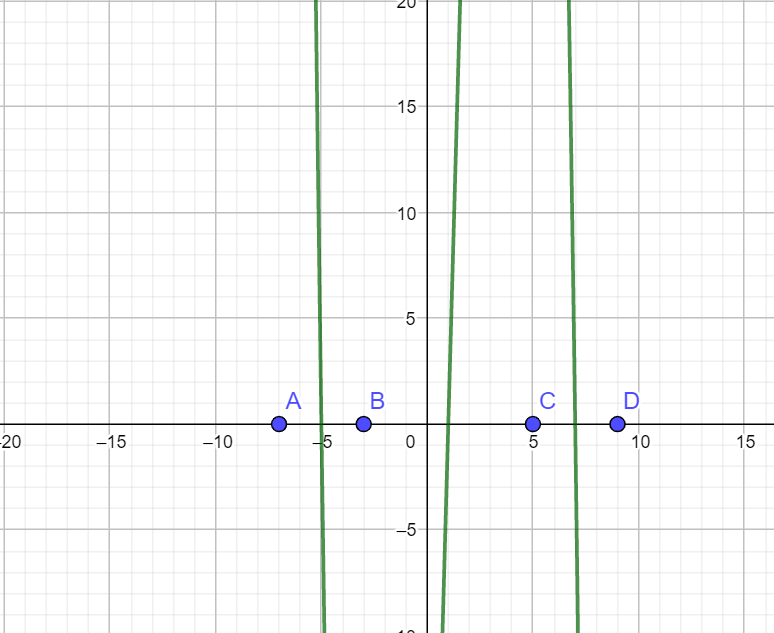


**b.** No hay $(D+2)$ puntos que son divididos por $\mathcal{H}$.
 
**Respuesta.** Siguiendo lo que se hizo en el anterior punto podemos llegar a armar y ordenar la lista a partir de los datos y la dicotomía dadas, pero al tener que contar el número de cambios de signo en la lista puede darse el caso en el que, como hay $D+2$ datos, sea posible que tengamos el caso en el que la hipótesis deba tener $D+1$ cambios de signo, lo que nos diría que el polinomio tiene $D+1$ raíces gracias al teorema de Bolzano:
 
>Si una función $f(x)$ está definida y es continua en un intervalo cerrado $[a, b]$ y toma valores de distinto signo en los extremos a y b, entonces existe al menos un punto c del intervalo abierto (a, b) en el que se anula la función.  
 
Por lo que, debido a cómo está construido $\mathcal{H}$, es imposible que alguna de las funciones hipótesis tenga $D+1$ raíces.



#**7. Problema 2.20 (Incompleto)**
Hay un número de cotas de la generalización del error $\epsilon$, todo ello con una probabilidad al menos $1-\delta$.

**a.** Cota VC original:
$$\epsilon\leq\sqrt{\frac{8}{N}\ln{\frac{4m_{\mathcal{H}}(2N)}{\delta}}}.$$

**b.** Rademacher Penalty Bound:
$$\epsilon\leq\sqrt{\frac{2\ln({2Nm_{\mathcal{H}}(N)})}{N}}+\sqrt{\frac{2}{N}\ln{\frac{1}{\delta}}}+\frac{1}{N}.$$

**c.** Parrondo y Van den Broek:
$$\epsilon\leq\sqrt{\frac{1}{N}\left(2\epsilon+\ln{\frac{6m_{\mathcal{H}}(2N)}{\delta}}\right)}$$

**d.** Devroye:
$$\epsilon\leq\sqrt{\frac{1}{2N}\left( 4\epsilon(1+\epsilon) +  \ln{\frac{4m_{\mathcal{H}}(N^2)}{\delta}})\right)}$$

Ver que **c.** y **d.** son cotas implícitas en $\epsilon$. Fijar $d_{VC}=50$ Y $\delta=0.05$ y graficar estas cotas como función de $N$. ¿Cuál es la mejor?

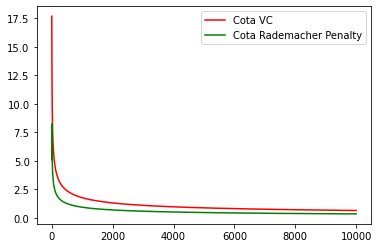

In [11]:
import matplotlib.pyplot as plt

#Asumimos que la función de crecimiento es N^(d_VC)+1
def cotaVC(N,dVC,d):
  return np.sqrt(8/N*np.log(4*((2*N)**dVC+1)/d))
def cotaRPB(N,dVC,d):
  return np.sqrt((2*np.log(2*N*(N**dVC+1)))/N)+np.sqrt(2/N*np.log(1/d))+1/N

dVC=50
d=0.05

x = np.arange(1, 10000)*1.0
y1 = []
y2 = []
for N in x:
    y1.append(cotaVC(N, dVC, d))
    y2.append(cotaRPB(N, dVC, d))

plt.plot(x, y1, color='red', label='Cota VC')
plt.plot(x, y2, color='green', label='Cota Rademacher Penalty')
plt.legend()